# SNA

In [17]:
# automatically reload imports before executing any line in case you changed something
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import read_graph
import viz
import utils

## Show Inland comments network

Idea:
- 1: get community of people interested in Inland articles
  - Interest = any interaction on any Inland article ever 
  - maybe set some lower boundary (eg >= 10 interactions total)
- 2: for each day plot interactions between those users 
  - as graph with 1 node per user and an edge betwween users if there was at least 1 interaction on that day
  - Edge width = number of interactions between these users on that day
  - how to view so many plots in a sensible fashion?
- 3: calculate some metrics for each day and plot as line plot
  - total number of interactions
  - num interactions / interacting users to account for changing user numbers
  - others like connectedness / etc. ?

In [33]:
all_postings = utils.read_all_postings()
all_votes = utils.read_all_votes()
all_postings.shape, all_votes.shape

((739094, 14), (3824984, 8))

### show users with most interactions in Inland postings over the entire time frame

info: note the minimum threshold for displaying an edge (here 25) and the scale on the right for comparing between days

In [34]:
# Ibiza Artikel ist unter "Meinung", aber anderer Strache Artikel (Inland) am selben Tag hat eh ~5 mal mehr postings also bleib ich mal bei Inland
postings_inl = all_postings.query("ArticleChannel == 'Inland'")

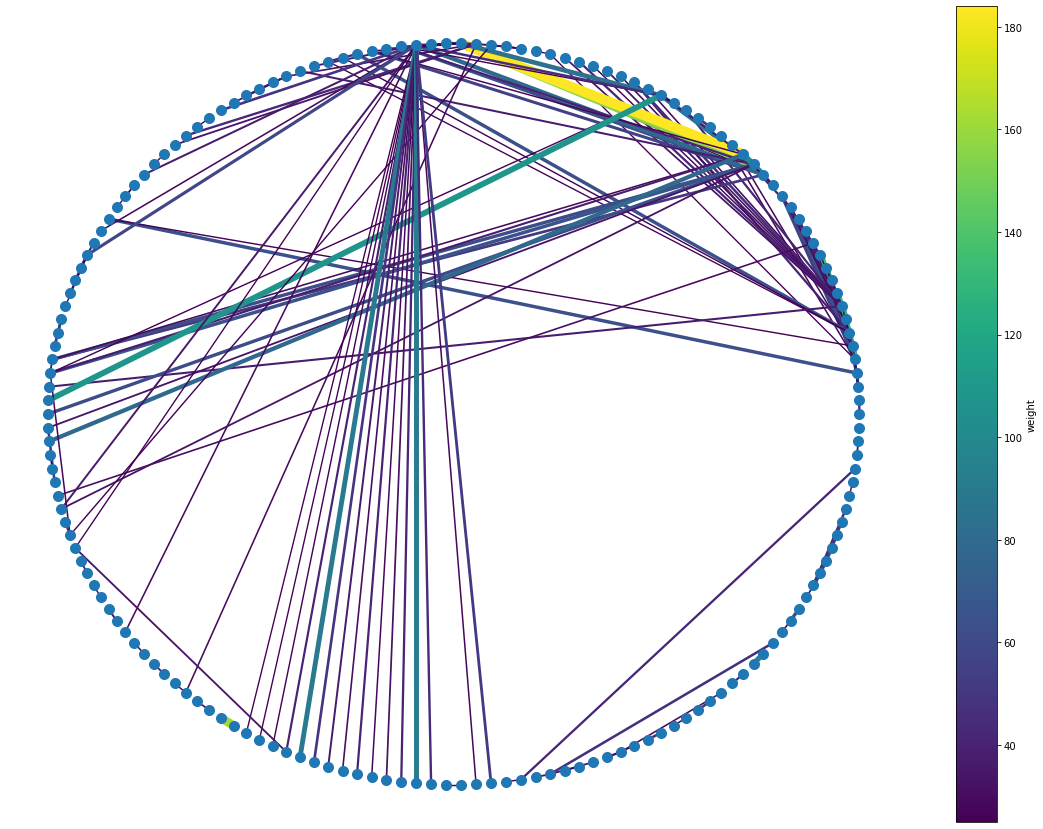

In [35]:
G_int_w = read_graph.get_weighted_interaction_graph(postings_inl, all_votes, 25)
viz.plot_colored_graph(G_int_w, edge_color_attr="weight", edge_width_factor=10, figsize=(20, 15), node_size=100, pos=nx.circular_layout(G_int_w))

### compare strache day with day before / after

In [36]:
postings_inl_0 = postings_inl.query("'2019-05-17' <= PostingCreatedAt & PostingCreatedAt < '2019-05-18'")
votes_0 = all_votes.query("'2019-05-17' <= VoteCreatedAt & VoteCreatedAt < '2019-05-18'")

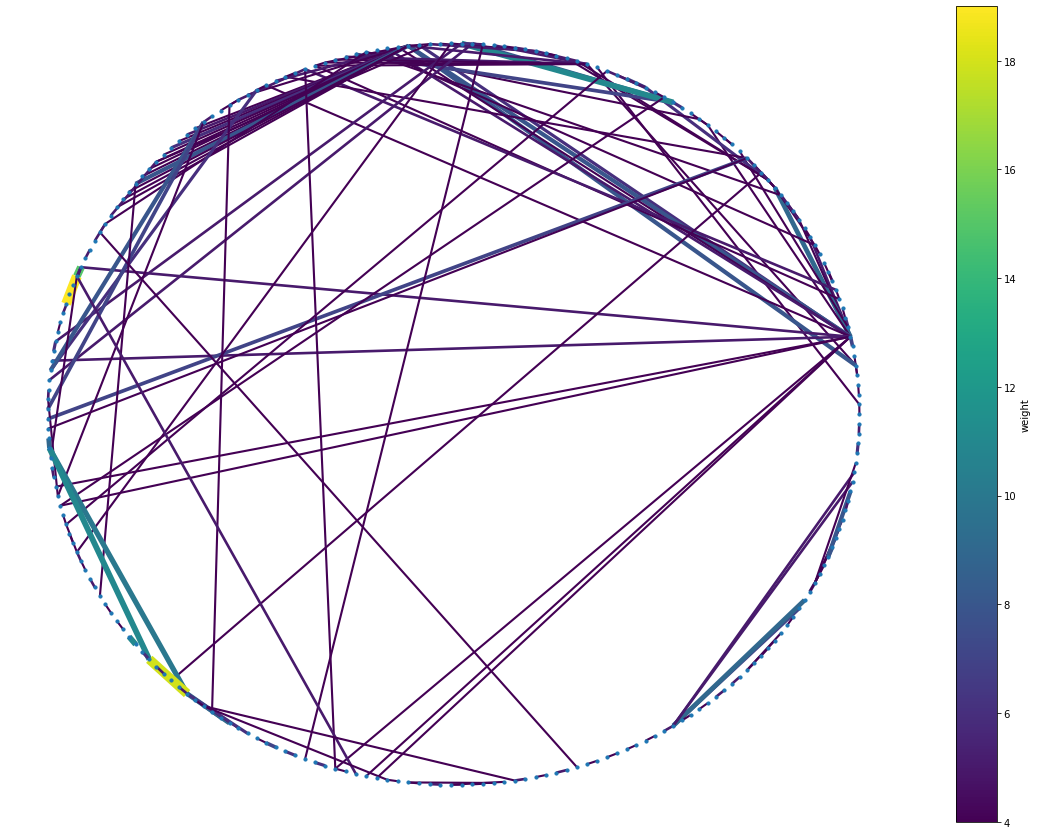

In [37]:
G_int_w = read_graph.get_weighted_interaction_graph(postings_inl_0, votes_0, 4)
viz.plot_colored_graph(G_int_w, edge_color_attr="weight", edge_width_factor=10, figsize=(20, 15), node_size=10, pos=nx.circular_layout(G_int_w))

#### day before

In [38]:
postings_inl_b = postings_inl.query("'2019-05-16' <= PostingCreatedAt & PostingCreatedAt < '2019-05-17'")
votes_b = all_votes.query("'2019-05-16' <= VoteCreatedAt & VoteCreatedAt < '2019-05-17'")

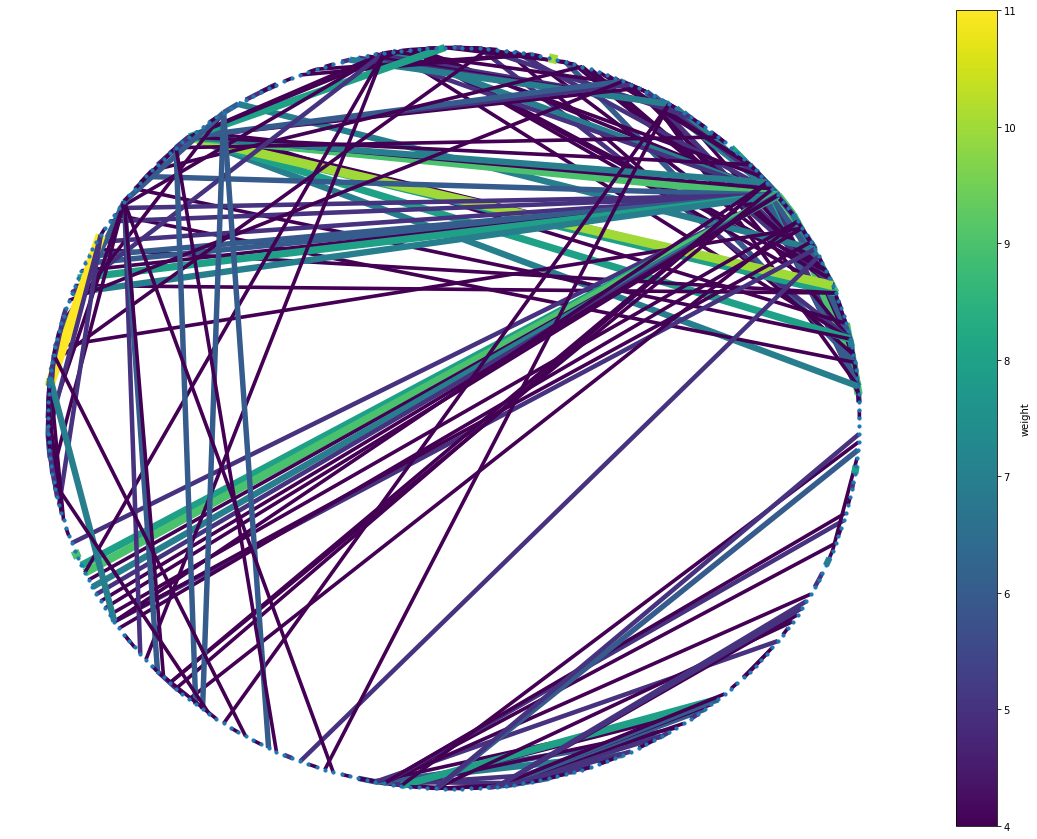

In [39]:
G_int_w = read_graph.get_weighted_interaction_graph(postings_inl_b, votes_b, 4)
viz.plot_colored_graph(G_int_w, edge_color_attr="weight", edge_width_factor=10, figsize=(20, 15), node_size=10, pos=nx.circular_layout(G_int_w))

a bit more than on strache day (scale only goes to 11 compared to 17 above)

#### day after

In [40]:
postings_inl_a = postings_inl.query("'2019-05-18' <= PostingCreatedAt & PostingCreatedAt < '2019-05-19'")
votes_a = all_votes.query("'2019-05-18' <= VoteCreatedAt & VoteCreatedAt < '2019-05-19'")

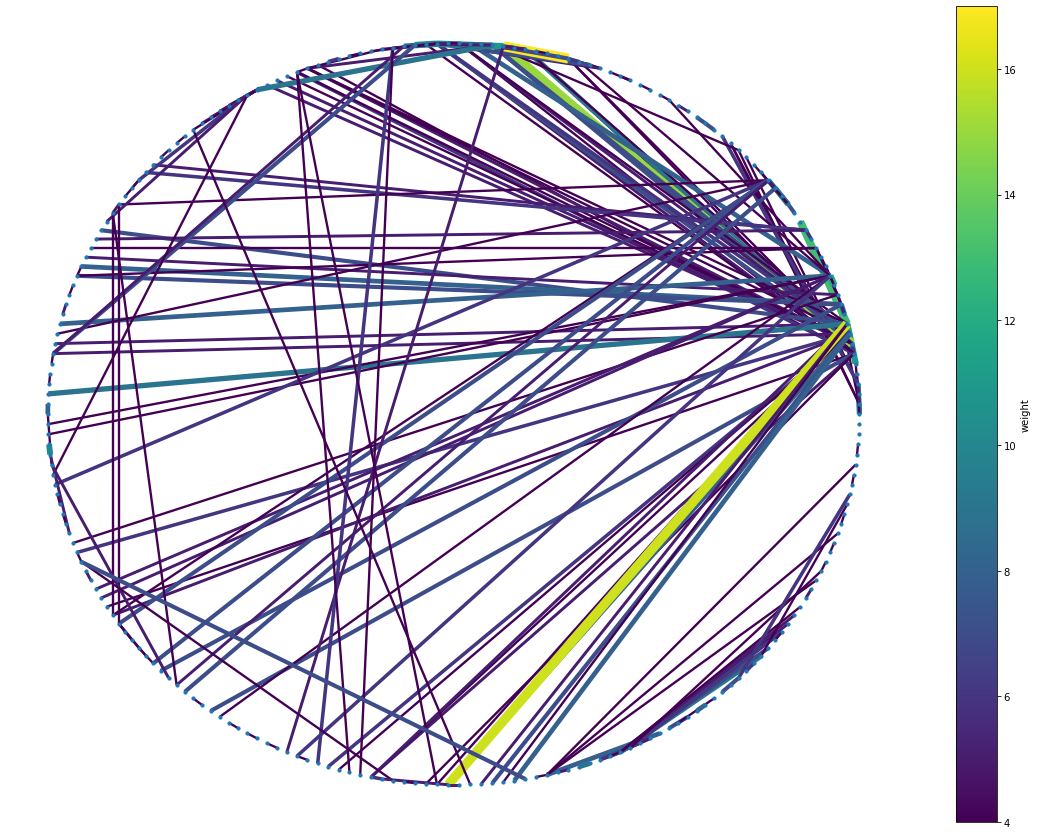

In [41]:
G_int_w = read_graph.get_weighted_interaction_graph(postings_inl_a, votes_a, 4)
viz.plot_colored_graph(G_int_w, edge_color_attr="weight", edge_width_factor=10, figsize=(20, 15), node_size=10, pos=nx.circular_layout(G_int_w))

a lot more than on strache day. Maybe most people read the post on the next day as it was posted in the afternoon?

#### 2 days after

In [42]:
postings_inl_a2 = postings_inl.query("'2019-05-19' <= PostingCreatedAt & PostingCreatedAt < '2019-05-20'")
votes_a2 = all_votes.query("'2019-05-19' <= VoteCreatedAt & VoteCreatedAt < '2019-05-20'")

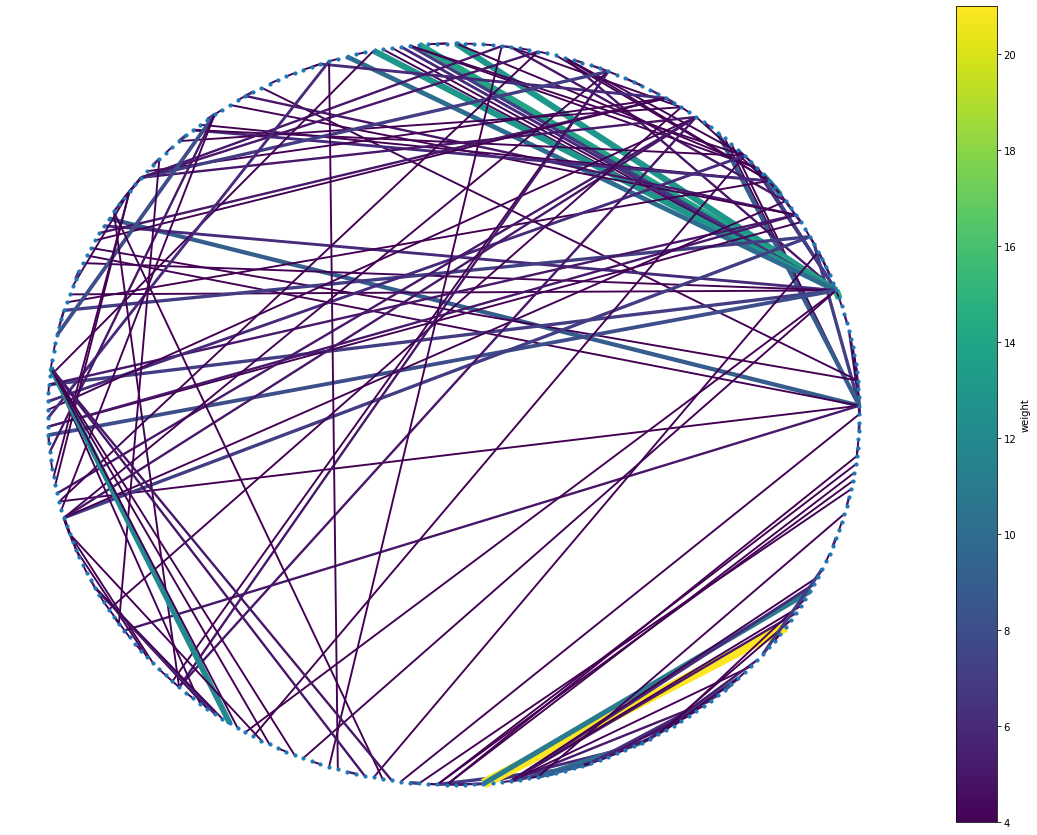

In [43]:
G_int_w = read_graph.get_weighted_interaction_graph(postings_inl_a2, votes_a2, 4)
viz.plot_colored_graph(G_int_w, edge_color_attr="weight", edge_width_factor=10, figsize=(20, 15), node_size=10, pos=nx.circular_layout(G_int_w))

still alot 2 days after (scale goes to 21 compared to 16)

## Compare number of interactions in Inland over time

In [44]:
connections = []
all_postings = []
# 01.05.2019 - 31.05.2019 Inland interactions (comment, like, dislike)
for i in range(0,31):
    startday = "2019-05-{}".format(str(1+i))
    endday = "2019-05-{}".format(str(1+i+1))
    postings = postings_inl.query("'{}' <= PostingCreatedAt & PostingCreatedAt < '{}'".format(startday,endday))
    votes = all_votes.query("'{}' <= VoteCreatedAt & VoteCreatedAt < '{}'".format(startday,endday))
    G = read_graph.get_all_users_interactions(postings, votes, multi_di_graph=True)
    connections.append(len(G.edges))
    all_postings.append(len(postings))

Text(0.5, 1.0, 'Interaction in Inland posts from 01.05.2019 until 31.05.2019')

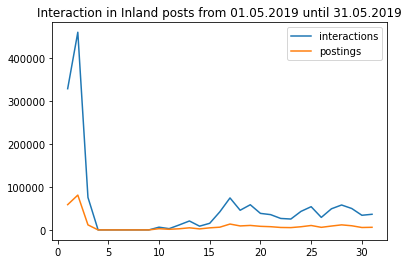

In [45]:
plt.plot(list(range(1,32)), connections)
plt.plot(list(range(1,32)), all_postings)
plt.legend(["interactions","postings"])
plt.title("Interaction in Inland posts from 01.05.2019 until 31.05.2019")

# Compare specific community over time

In [ ]:
# todo